In [1]:
import pickle
from itertools import product
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

In [2]:
plt.style.use(["science", "nature"])
FIG_DIR = "figures/bo_vs_rl"

In [3]:
with open("data/bo_vs_rl/simulation/rl_grid/polished_donkey.pkl", "rb") as f:
    rl_grid_polished_donkey = pickle.load(f)

In [4]:
target_beams = np.stack([trial["target_beam"] for trial in rl_grid_polished_donkey])
final_beams = np.stack([trial["final_beam"] for trial in rl_grid_polished_donkey])
maes = np.mean(np.abs(target_beams - final_beams), axis=1).reshape(20, 20, 20, 20)

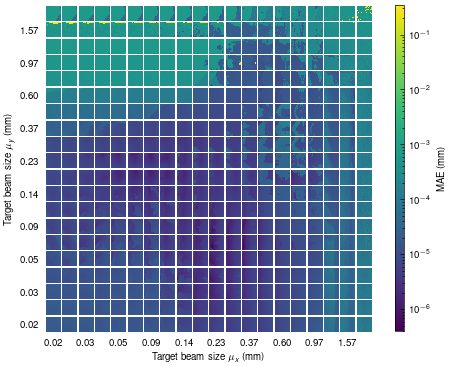

In [5]:
fig, ax = plt.subplots(
    figsize=(345 / 72.72 * 0.9, 345 / 72.72 * 0.9), sharex=True, sharey=True
)

for i, j in product(range(20), range(20)):
    left = 0.05 + i
    right = left + 0.9
    bottom = 0.05 + j
    top = bottom + 0.9
    ax.imshow(
        # np.log(maes[:, i, :, j]),
        maes[:, i, :, j],
        # vmin=np.log(maes).min(),
        # vmax=np.log(maes).max(),
        extent=[left, right, bottom, top],
        interpolation="none",
        cmap="viridis",
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
    )
[ax.spines[side].set_visible(False) for side in ("top", "right", "bottom", "left")]
ax.set_xlim([-0.05, 20.05])
ax.set_ylim([-0.05, 20.05])
ax.set_xlabel(r"Target beam size $\mu_x$ (mm)")
ax.set_ylabel(r"Target beam size $\mu_y$ (mm)")

ax.set_xticks(np.arange(0.5, 20.5, 2))
ax.set_yticks(np.arange(0.5, 20.5, 2))
# Set tick labels in scientific notation with no more than 3 significant digits
x_beam_sizes = np.array(
    [target_beams[:, 1].reshape(20, 20, 20, 20)[:, i, :, 0][0, 0] for i in range(20)]
)
y_beam_sizes = np.array(
    [target_beams[:, 3].reshape(20, 20, 20, 20)[:, 0, :, j][0, 0] for j in range(20)]
)
ax.set_xticklabels([f"{x:.2f}" for x in x_beam_sizes[::2] * 1_000])
ax.set_yticklabels([f"{y:.2f}" for y in y_beam_sizes[::2] * 1_000])

ax.tick_params(which="major", length=0)
ax.tick_params(which="minor", length=0)

# Add a colourbar manually for all of the maes in log space
cax = fig.add_axes([0.95, 0.115, 0.02, 0.764])
cbar = fig.colorbar(
    plt.cm.ScalarMappable(
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
        cmap="viridis",
    ),
    cax=cax,
)
cbar.set_label("MAE (mm)")

fig.savefig(f"{FIG_DIR}/target_beam_grid_scan_polished_donkey.pdf")

In [6]:
with open("data/bo_vs_rl/simulation/rl_grid/polar_lake.pkl", "rb") as f:
    rl_grid_polar_lake = pickle.load(f)

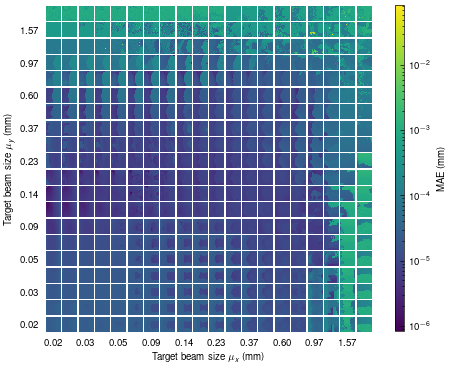

In [7]:
target_beams = np.stack([trial["target_beam"] for trial in rl_grid_polar_lake])
final_beams = np.stack([trial["final_beam"] for trial in rl_grid_polar_lake])
maes = np.mean(np.abs(target_beams - final_beams), axis=1).reshape(20, 20, 20, 20)

fig, ax = plt.subplots(
    figsize=(345 / 72.72 * 0.9, 345 / 72.72 * 0.9), sharex=True, sharey=True
)

for i, j in product(range(20), range(20)):
    left = 0.05 + i
    right = left + 0.9
    bottom = 0.05 + j
    top = bottom + 0.9
    ax.imshow(
        # np.log(maes[:, i, :, j]),
        maes[:, i, :, j],
        # vmin=np.log(maes).min(),
        # vmax=np.log(maes).max(),
        extent=[left, right, bottom, top],
        interpolation="none",
        cmap="viridis",
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
    )
[ax.spines[side].set_visible(False) for side in ("top", "right", "bottom", "left")]
ax.set_xlim([-0.05, 20.05])
ax.set_ylim([-0.05, 20.05])
ax.set_xlabel(r"Target beam size $\mu_x$ (mm)")
ax.set_ylabel(r"Target beam size $\mu_y$ (mm)")

ax.set_xticks(np.arange(0.5, 20.5, 2))
ax.set_yticks(np.arange(0.5, 20.5, 2))
# Set tick labels in scientific notation with no more than 3 significant digits
x_beam_sizes = np.array(
    [target_beams[:, 1].reshape(20, 20, 20, 20)[:, i, :, 0][0, 0] for i in range(20)]
)
y_beam_sizes = np.array(
    [target_beams[:, 3].reshape(20, 20, 20, 20)[:, 0, :, j][0, 0] for j in range(20)]
)
ax.set_xticklabels([f"{x:.2f}" for x in x_beam_sizes[::2] * 1_000])
ax.set_yticklabels([f"{y:.2f}" for y in y_beam_sizes[::2] * 1_000])

ax.tick_params(which="major", length=0)
ax.tick_params(which="minor", length=0)

# Add a colourbar manually for all of the maes in log space
cax = fig.add_axes([0.95, 0.115, 0.02, 0.764])
cbar = fig.colorbar(
    plt.cm.ScalarMappable(
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
        cmap="viridis",
    ),
    cax=cax,
)
cbar.set_label("MAE (mm)")

fig.savefig(f"{FIG_DIR}/target_beam_grid_scan_polar_lake.pdf")

In [8]:
with open("data/bo_vs_rl/simulation/rl_grid/still_deluge.pkl", "rb") as f:
    rl_grid_still_deluge = pickle.load(f)

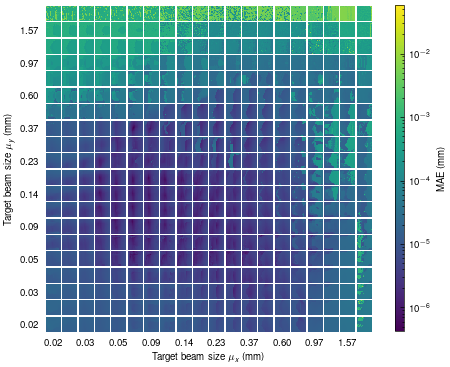

In [9]:
target_beams = np.stack([trial["target_beam"] for trial in rl_grid_still_deluge])
final_beams = np.stack([trial["final_beam"] for trial in rl_grid_still_deluge])
maes = np.mean(np.abs(target_beams - final_beams), axis=1).reshape(20, 20, 20, 20)

fig, ax = plt.subplots(
    figsize=(345 / 72.72 * 0.9, 345 / 72.72 * 0.9), sharex=True, sharey=True
)

for i, j in product(range(20), range(20)):
    left = 0.05 + i
    right = left + 0.9
    bottom = 0.05 + j
    top = bottom + 0.9
    ax.imshow(
        # np.log(maes[:, i, :, j]),
        maes[:, i, :, j],
        # vmin=np.log(maes).min(),
        # vmax=np.log(maes).max(),
        extent=[left, right, bottom, top],
        interpolation="none",
        cmap="viridis",
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
    )
[ax.spines[side].set_visible(False) for side in ("top", "right", "bottom", "left")]
ax.set_xlim([-0.05, 20.05])
ax.set_ylim([-0.05, 20.05])
ax.set_xlabel(r"Target beam size $\mu_x$ (mm)")
ax.set_ylabel(r"Target beam size $\mu_y$ (mm)")

ax.set_xticks(np.arange(0.5, 20.5, 2))
ax.set_yticks(np.arange(0.5, 20.5, 2))
# Set tick labels in scientific notation with no more than 3 significant digits
x_beam_sizes = np.array(
    [target_beams[:, 1].reshape(20, 20, 20, 20)[:, i, :, 0][0, 0] for i in range(20)]
)
y_beam_sizes = np.array(
    [target_beams[:, 3].reshape(20, 20, 20, 20)[:, 0, :, j][0, 0] for j in range(20)]
)
ax.set_xticklabels([f"{x:.2f}" for x in x_beam_sizes[::2] * 1_000])
ax.set_yticklabels([f"{y:.2f}" for y in y_beam_sizes[::2] * 1_000])

ax.tick_params(which="major", length=0)
ax.tick_params(which="minor", length=0)

# Add a colourbar manually for all of the maes in log space
cax = fig.add_axes([0.95, 0.115, 0.02, 0.764])
cbar = fig.colorbar(
    plt.cm.ScalarMappable(
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
        cmap="viridis",
    ),
    cax=cax,
)
cbar.set_label("MAE (mm)")

fig.savefig(f"{FIG_DIR}/target_beam_grid_scan_still_deluge.pdf")

In [10]:
with open("data/bo_vs_rl/simulation/random_grid/random.pkl", "rb") as f:
    random_grid = pickle.load(f)

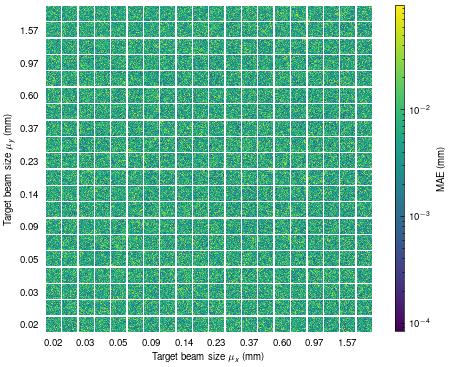

In [11]:
target_beams = np.stack([trial["target_beam"] for trial in random_grid])
final_beams = np.stack([trial["final_beam"] for trial in random_grid])
maes = np.mean(np.abs(target_beams - final_beams), axis=1).reshape(20, 20, 20, 20)

fig, ax = plt.subplots(
    figsize=(345 / 72.72 * 0.9, 345 / 72.72 * 0.9), sharex=True, sharey=True
)

for i, j in product(range(20), range(20)):
    left = 0.05 + i
    right = left + 0.9
    bottom = 0.05 + j
    top = bottom + 0.9
    ax.imshow(
        # np.log(maes[:, i, :, j]),
        maes[:, i, :, j],
        # vmin=np.log(maes).min(),
        # vmax=np.log(maes).max(),
        extent=[left, right, bottom, top],
        interpolation="none",
        cmap="viridis",
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
    )
[ax.spines[side].set_visible(False) for side in ("top", "right", "bottom", "left")]
ax.set_xlim([-0.05, 20.05])
ax.set_ylim([-0.05, 20.05])
ax.set_xlabel(r"Target beam size $\mu_x$ (mm)")
ax.set_ylabel(r"Target beam size $\mu_y$ (mm)")

ax.set_xticks(np.arange(0.5, 20.5, 2))
ax.set_yticks(np.arange(0.5, 20.5, 2))
# Set tick labels in scientific notation with no more than 3 significant digits
x_beam_sizes = np.array(
    [target_beams[:, 1].reshape(20, 20, 20, 20)[:, i, :, 0][0, 0] for i in range(20)]
)
y_beam_sizes = np.array(
    [target_beams[:, 3].reshape(20, 20, 20, 20)[:, 0, :, j][0, 0] for j in range(20)]
)
ax.set_xticklabels([f"{x:.2f}" for x in x_beam_sizes[::2] * 1_000])
ax.set_yticklabels([f"{y:.2f}" for y in y_beam_sizes[::2] * 1_000])

ax.tick_params(which="major", length=0)
ax.tick_params(which="minor", length=0)

# Add a colourbar manually for all of the maes in log space
cax = fig.add_axes([0.95, 0.115, 0.02, 0.764])
cbar = fig.colorbar(
    plt.cm.ScalarMappable(
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
        cmap="viridis",
    ),
    cax=cax,
)
cbar.set_label("MAE (mm)")

fig.savefig(f"{FIG_DIR}/target_beam_grid_scan_random_search.pdf")

In [12]:
with open("data/bo_vs_rl/simulation/rl_grid/polished_donkey_trial_2.pkl", "rb") as f:
    rl_grid_polished_donkey_trial_2 = pickle.load(f)

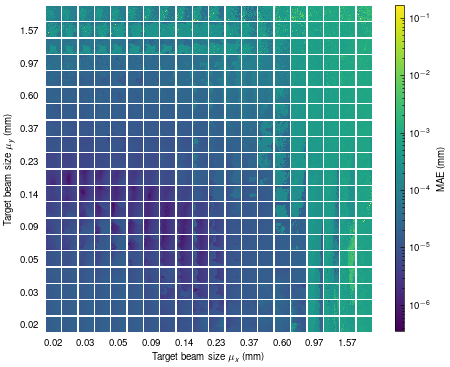

In [13]:
target_beams = np.stack(
    [trial["target_beam"] for trial in rl_grid_polished_donkey_trial_2]
)
final_beams = np.stack(
    [trial["final_beam"] for trial in rl_grid_polished_donkey_trial_2]
)
maes = np.mean(np.abs(target_beams - final_beams), axis=1).reshape(20, 20, 20, 20)

fig, ax = plt.subplots(
    figsize=(345 / 72.72 * 0.9, 345 / 72.72 * 0.9), sharex=True, sharey=True
)

for i, j in product(range(20), range(20)):
    left = 0.05 + i
    right = left + 0.9
    bottom = 0.05 + j
    top = bottom + 0.9
    ax.imshow(
        # np.log(maes[:, i, :, j]),
        maes[:, i, :, j],
        # vmin=np.log(maes).min(),
        # vmax=np.log(maes).max(),
        extent=[left, right, bottom, top],
        interpolation="none",
        cmap="viridis",
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
    )
[ax.spines[side].set_visible(False) for side in ("top", "right", "bottom", "left")]
ax.set_xlim([-0.05, 20.05])
ax.set_ylim([-0.05, 20.05])
ax.set_xlabel(r"Target beam size $\mu_x$ (mm)")
ax.set_ylabel(r"Target beam size $\mu_y$ (mm)")

ax.set_xticks(np.arange(0.5, 20.5, 2))
ax.set_yticks(np.arange(0.5, 20.5, 2))
# Set tick labels in scientific notation with no more than 3 significant digits
x_beam_sizes = np.array(
    [target_beams[:, 1].reshape(20, 20, 20, 20)[:, i, :, 0][0, 0] for i in range(20)]
)
y_beam_sizes = np.array(
    [target_beams[:, 3].reshape(20, 20, 20, 20)[:, 0, :, j][0, 0] for j in range(20)]
)
ax.set_xticklabels([f"{x:.2f}" for x in x_beam_sizes[::2] * 1_000])
ax.set_yticklabels([f"{y:.2f}" for y in y_beam_sizes[::2] * 1_000])

ax.tick_params(which="major", length=0)
ax.tick_params(which="minor", length=0)

# Add a colourbar manually for all of the maes in log space
cax = fig.add_axes([0.95, 0.115, 0.02, 0.764])
cbar = fig.colorbar(
    plt.cm.ScalarMappable(
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
        cmap="viridis",
    ),
    cax=cax,
)
cbar.set_label("MAE (mm)")

fig.savefig(f"{FIG_DIR}/target_beam_grid_scan_polished_donkey_other_trial.pdf")

In [14]:
bo_grid = []
bo_grid_dir = Path("data/bo_vs_rl/simulation/bo_grid")
bo_grid_files = sorted(bo_grid_dir.glob("bo_*.pkl"))
for filepath in bo_grid_files:
    with open(filepath, "rb") as f:
        bo_grid += pickle.load(f)

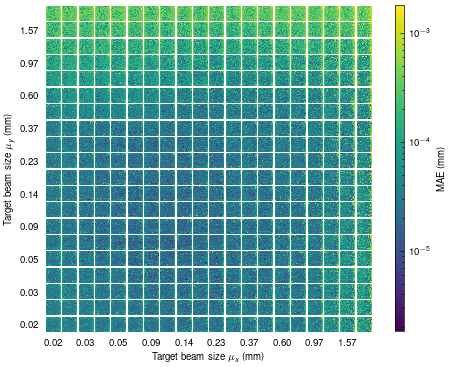

In [15]:
target_beams = np.stack([trial["target_beam"] for trial in bo_grid])
final_beams = np.stack([trial["final_beam"] for trial in bo_grid])
maes = np.mean(np.abs(target_beams - final_beams), axis=1).reshape(20, 20, 20, 20)

fig, ax = plt.subplots(
    figsize=(345 / 72.72 * 0.9, 345 / 72.72 * 0.9), sharex=True, sharey=True
)

for i, j in product(range(20), range(20)):
    left = 0.05 + i
    right = left + 0.9
    bottom = 0.05 + j
    top = bottom + 0.9
    ax.imshow(
        # np.log(maes[:, i, :, j]),
        maes[:, i, :, j],
        # vmin=np.log(maes).min(),
        # vmax=np.log(maes).max(),
        extent=[left, right, bottom, top],
        interpolation="none",
        cmap="viridis",
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
    )
[ax.spines[side].set_visible(False) for side in ("top", "right", "bottom", "left")]
ax.set_xlim([-0.05, 20.05])
ax.set_ylim([-0.05, 20.05])
ax.set_xlabel(r"Target beam size $\mu_x$ (mm)")
ax.set_ylabel(r"Target beam size $\mu_y$ (mm)")

ax.set_xticks(np.arange(0.5, 20.5, 2))
ax.set_yticks(np.arange(0.5, 20.5, 2))
# Set tick labels in scientific notation with no more than 3 significant digits
x_beam_sizes = np.array(
    [target_beams[:, 1].reshape(20, 20, 20, 20)[:, i, :, 0][0, 0] for i in range(20)]
)
y_beam_sizes = np.array(
    [target_beams[:, 3].reshape(20, 20, 20, 20)[:, 0, :, j][0, 0] for j in range(20)]
)
ax.set_xticklabels([f"{x:.2f}" for x in x_beam_sizes[::2] * 1_000])
ax.set_yticklabels([f"{y:.2f}" for y in y_beam_sizes[::2] * 1_000])

ax.tick_params(which="major", length=0)
ax.tick_params(which="minor", length=0)

# Add a colourbar manually for all of the maes in log space
cax = fig.add_axes([0.95, 0.115, 0.02, 0.764])
cbar = fig.colorbar(
    plt.cm.ScalarMappable(
        norm=matplotlib.colors.LogNorm(vmin=maes.min(), vmax=maes.max()),
        cmap="viridis",
    ),
    cax=cax,
)
cbar.set_label("MAE (mm)")

fig.savefig(f"{FIG_DIR}/target_beam_grid_scan_bayesian_optimisation.pdf")